# Table of Contents

1. [Introduction](#Introduction)
2. [Required Modules](#Required-Modules)
3. [Data Preprocessing](#Data-Preprocessing)
  - [Key Features](#Key-Features)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Missing Values](#Missing-Values)
  - [Data Transformation](#Data-Transformation)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Visualization](#Visualization)
  - [Correlation](#Correlation)
5. [Model Building](#Model-Building)
  - [Naive Bayes Classifier](#Naive-Bayes-Classifier)
  - [K-Nearest Neighbours](#K--Nearest-Neighbours)
6. [Evaluation](#Evaluation)
7. [Conclusion](#Conclusion)

## 1. Introduction <a name="Introduction"></a>

In this project, we aim to utilize both the extracted features from MRI images and data obtained from the ADNI (Alzheimer's Disease Neuroimaging Initiative) database to develop a classification model for Alzheimer's disease patients.

The objective of this project is to leverage a dataset consisting of 220 samples, each with 16 features extracted from MRI images, to train a classifier model. This model will enable the classification of subjects into two categories: those with cognitive normalcy and those diagnosed with Alzheimer's disease. By incorporating both MRI-based features and relevant data from the ADNI database, we aim to develop an accurate and reliable model that can aid in the early detection and diagnosis of Alzheimer's disease.








## 2. Required Modules <a name="Required-Modules"></a>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## 3. Data Preprocessing <a name="Data-Preprocessing"></a>
In this section, we discuss the steps taken to preprocess the dataset. Through preprocessing steps, including data cleaning, handling missing values, and converting categorical variables into numerical formats, we will ensure the dataset is ready for analysis.


### 3.1 Key Features <a name="Key-Features"></a>
The dataset contains the following information:




In [ ]:
# Load the data
data = pd.read_csv('Data_training_and_val_set_CNvsAD.csv')
data.head(-1)

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
0,1063,937159,1401690,38855.4,3427.13,3262.01,1045.280,1263.010,2.44566,2.48342,2.47434,2.49197,2.27057,2.11083,2.99752,3.24032,0
1,184,901429,1235930,10081.2,3410.35,3693.69,529.756,391.364,2.52101,2.69526,2.81781,2.76115,2.42640,2.50153,3.40556,3.36431,0
2,16,935565,1345440,21299.0,3621.49,3802.43,887.978,1135.170,2.45128,2.53828,2.40015,2.46122,1.99782,2.40015,3.19497,3.02149,0
3,575,884775,1325760,69220.3,2802.91,3098.38,3215.570,3370.800,2.59348,2.62409,2.50552,2.95271,2.09972,2.12354,2.43217,2.99445,0
4,403,1062950,1498230,32967.7,3416.55,4103.49,1648.410,1480.410,2.78544,2.76651,2.71469,2.54695,2.38363,2.48169,3.71762,3.86305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,310,880382,1411200,55534.1,2555.54,1957.66,2486.780,3299.060,2.04847,1.95649,2.34933,2.31339,2.02422,1.93387,2.00214,1.54672,1
215,712,856859,1323290,64639.2,2889.79,2612.19,3275.190,6056.760,2.14352,1.83373,2.45002,1.94460,2.35629,1.88668,2.24954,1.82813,1
216,1377,1097900,1716660,76240.9,2661.54,3167.81,2745.350,4233.470,2.13888,1.84534,2.17948,1.90322,1.95258,1.75652,2.37322,2.25815,1
217,1254,973188,1561140,90250.4,2653.06,2605.33,3005.910,5159.180,2.43028,2.39199,2.23769,2.37436,2.10478,2.11616,2.36305,2.62898,1


### 3.2 Descriptive Statistics <a name="Descriptive-Statistics"></a>

Now we generate the summary statistics:

- Count: The number of non-missing values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the amount of variation or dispersion in each column.
- Minimum: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- Median (50th Percentile or Q2): The middle value in each column. It represents the value below which 50% of the data falls.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Maximum: The maximum value in each column.


In [ ]:
data.describe()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
count,220.000000,2.200000e+02,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.00000
mean,697.381818,9.732298e+05,1.455089e+06,46819.713000,3147.849182,3315.357955,1742.216973,1748.802286,2.391393,2.428251,2.453312,2.439511,2.244598,2.235175,2.843245,2.943767,0.50000
std,410.637915,1.085988e+05,1.530882e+05,25260.106084,628.351722,645.180948,1031.871538,1101.229703,0.278645,0.271520,0.262927,0.267990,0.256248,0.244546,0.533821,0.573245,0.50114
min,7.000000,6.345910e+05,1.059560e+06,7552.460000,1723.310000,1768.950000,296.264000,318.735000,1.495310,1.707950,1.642300,1.677120,1.561400,1.497610,1.560000,1.498440,0.00000
25%,373.500000,8.992745e+05,1.343640e+06,28324.100000,2673.720000,2751.300000,1001.204250,979.807500,2.216502,2.242237,2.269475,2.269233,2.090515,2.097725,2.453882,2.526505,0.00000
50%,691.000000,9.744355e+05,1.454475e+06,42132.200000,3182.570000,3381.970000,1473.675000,1446.760000,2.430220,2.470915,2.462075,2.461980,2.286395,2.231705,2.891995,3.025985,0.50000
75%,1067.000000,1.044310e+06,1.565938e+06,59839.475000,3554.165000,3806.862500,2169.990000,2081.722500,2.601698,2.618500,2.640270,2.627133,2.412992,2.399287,3.271362,3.375520,1.00000
max,1430.000000,1.303590e+06,1.949090e+06,152927.000000,5514.940000,5750.400000,6082.040000,7210.340000,2.949880,3.010460,3.048830,3.141290,2.839030,2.790480,3.783510,4.075010,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RID         220 non-null    int64  
 1   BRAIN       220 non-null    int64  
 2   EICV        220 non-null    int64  
 3   VENTRICLES  220 non-null    float64
 4   LHIPPOC     220 non-null    float64
 5   RHIPPOC     220 non-null    float64
 6   LINFLATVEN  220 non-null    float64
 7   RINFLATVEN  220 non-null    float64
 8   LMIDTEMP    220 non-null    float64
 9   RMIDTEMP    220 non-null    float64
 10  LINFTEMP    220 non-null    float64
 11  RINFTEMP    220 non-null    float64
 12  LFUSIFORM   220 non-null    float64
 13  RFUSIFORM   220 non-null    float64
 14  LENTORHIN   220 non-null    float64
 15  RENTORHIN   220 non-null    float64
 16  DXCURREN    220 non-null    int64  
dtypes: float64(13), int64(4)
memory usage: 29.3 KB


### 3.3 Missing Values <a name="Missing-Values"></a>



In [ ]:
# Check for missing values in the dataset
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
#checking the data types of the columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 3.4 Data Transformation <a name="Data-Transformation"></a>



In [ ]:
# divide the data into two... for each group of the subjects
Demented = data[data.DXCURREN == 1]
Normal = data[data.DXCURREN == 0]

In [ ]:
Demented.head(-1)

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
110,829,837158,1210510,19389.3,2494.80,2114.81,954.183,1392.89,2.34852,1.95626,2.10836,2.10828,1.95346,1.76753,2.68557,1.91929,1
111,76,920332,1396340,35435.0,2411.57,2583.68,1543.810,2816.11,2.14305,2.21559,2.37143,2.07255,1.99188,1.82262,1.85328,2.18230,1
112,724,982159,1610120,117066.0,3429.70,3481.37,3681.200,4653.46,1.56256,1.85558,2.02994,2.12986,1.86509,1.89046,2.50532,2.92452,1
113,1307,1014660,1485850,45363.9,3369.99,3720.33,1644.340,1351.26,2.70015,2.52475,2.77891,2.64673,2.48652,2.39203,2.93112,3.25545,1
114,1101,753428,1118990,23837.3,2296.70,2699.53,1587.660,1344.40,2.25112,2.49144,2.38591,2.67168,2.12946,2.15804,2.56397,3.17536,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,310,880382,1411200,55534.1,2555.54,1957.66,2486.780,3299.06,2.04847,1.95649,2.34933,2.31339,2.02422,1.93387,2.00214,1.54672,1
215,712,856859,1323290,64639.2,2889.79,2612.19,3275.190,6056.76,2.14352,1.83373,2.45002,1.94460,2.35629,1.88668,2.24954,1.82813,1
216,1377,1097900,1716660,76240.9,2661.54,3167.81,2745.350,4233.47,2.13888,1.84534,2.17948,1.90322,1.95258,1.75652,2.37322,2.25815,1
217,1254,973188,1561140,90250.4,2653.06,2605.33,3005.910,5159.18,2.43028,2.39199,2.23769,2.37436,2.10478,2.11616,2.36305,2.62898,1


## 4. Exploratory Data Analysis <a name="Exploratory-Data-Analysis"></a>

Exploratory data analysis will allow us to gain insights into the distribution of features, detect correlations, and uncover potential patterns and trends.

### 4.1 Visualization <a name="Visualization"></a>

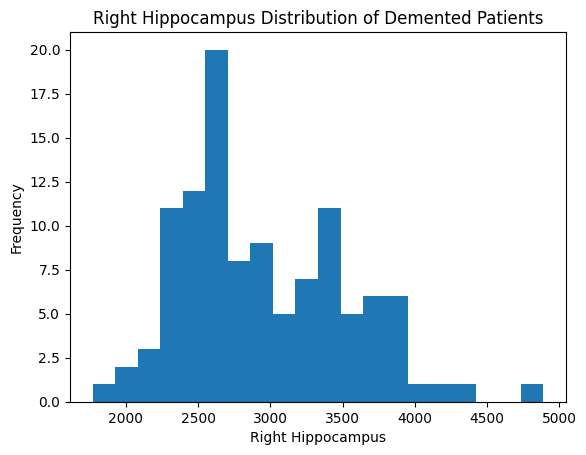

In [ ]:
plt.hist(Demented['RHIPPOC'], bins=20)
plt.title('Right Hippocampus Distribution of Demented Patients')
plt.xlabel('Right Hippocampus')
plt.ylabel('Frequency')
plt.show()

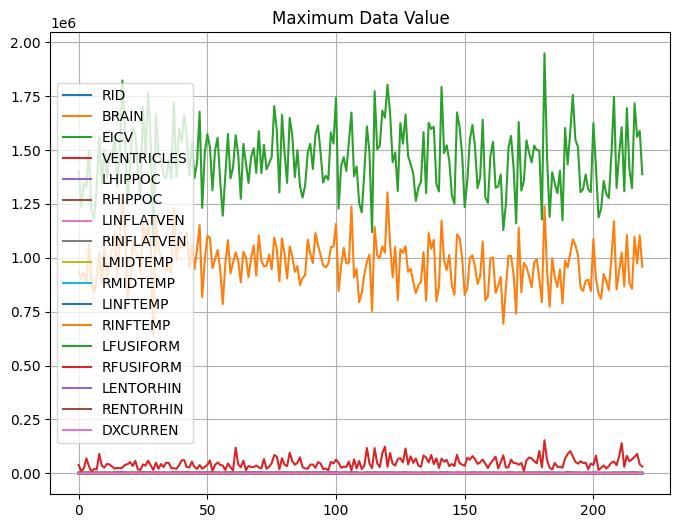

In [ ]:
data.plot(kind = 'line', figsize = (8,6))
plt.title('Maximum Data Value')
plt.grid()

### 4.2 Correlation <a name="Correlation"></a>

In [ ]:
data.corr()

,RID,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN,DXCURREN
RID,1.000000,-0.093466,-0.033590,0.064066,-0.175928,-0.165794,0.027802,0.026366,-0.140090,-0.170521,-0.071395,-0.057403,-0.124554,-0.056647,-0.142876,-0.128306,0.192822
BRAIN,-0.093466,1.000000,0.914554,0.173406,0.555175,0.593095,0.058577,0.005357,0.289149,0.302821,0.291468,0.283498,0.299817,0.312397,0.356856,0.322380,-0.213242
EICV,-0.033590,0.914554,1.000000,0.479153,0.388307,0.421946,0.332470,0.273800,0.034902,0.061162,0.058630,0.043293,0.046025,0.069940,0.139978,0.128261,-0.024218
VENTRICLES,0.064066,0.173406,0.479153,1.000000,-0.182743,-0.178253,0.777208,0.717445,-0.387530,-0.347546,-0.330725,-0.334839,-0.380378,-0.353161,-0.342013,-0.261059,0.345576
LHIPPOC,-0.175928,0.555175,0.388307,-0.182743,1.000000,0.882356,-0.390813,-0.358850,0.506860,0.515082,0.532376,0.480592,0.519097,0.471420,0.709872,0.619150,-0.614505
RHIPPOC,-0.165794,0.593095,0.421946,-0.178253,0.882356,1.000000,-0.326846,-0.402222,0.430293,0.543717,0.436532,0.499915,0.423725,0.482206,0.649987,0.698551,-0.564262
LINFLATVEN,0.027802,0.058577,0.332470,0.777208,-0.390813,-0.326846,1.000000,0.851397,-0.519734,-0.453266,-0.529090,-0.444729,-0.519430,-0.448445,-0.535279,-0.435775,0.492914
RINFLATVEN,0.026366,0.005357,0.273800,0.717445,-0.358850,-0.402222,0.851397,1.000000,-0.465602,-0.542264,-0.454759,-0.524645,-0.460305,-0.511817,-0.500521,-0.532744,0.459176
LMIDTEMP,-0.140090,0.289149,0.034902,-0.387530,0.506860,0.430293,-0.519734,-0.465602,1.000000,0.789518,0.871690,0.717138,0.803698,0.685172,0.635703,0.516767,-0.622248
RMIDTEMP,-0.170521,0.302821,0.061162,-0.347546,0.515082,0.543717,-0.453266,-0.542264,0.789518,1.000000,0.760003,0.874190,0.720606,0.791022,0.644477,0.667830,-0.626733


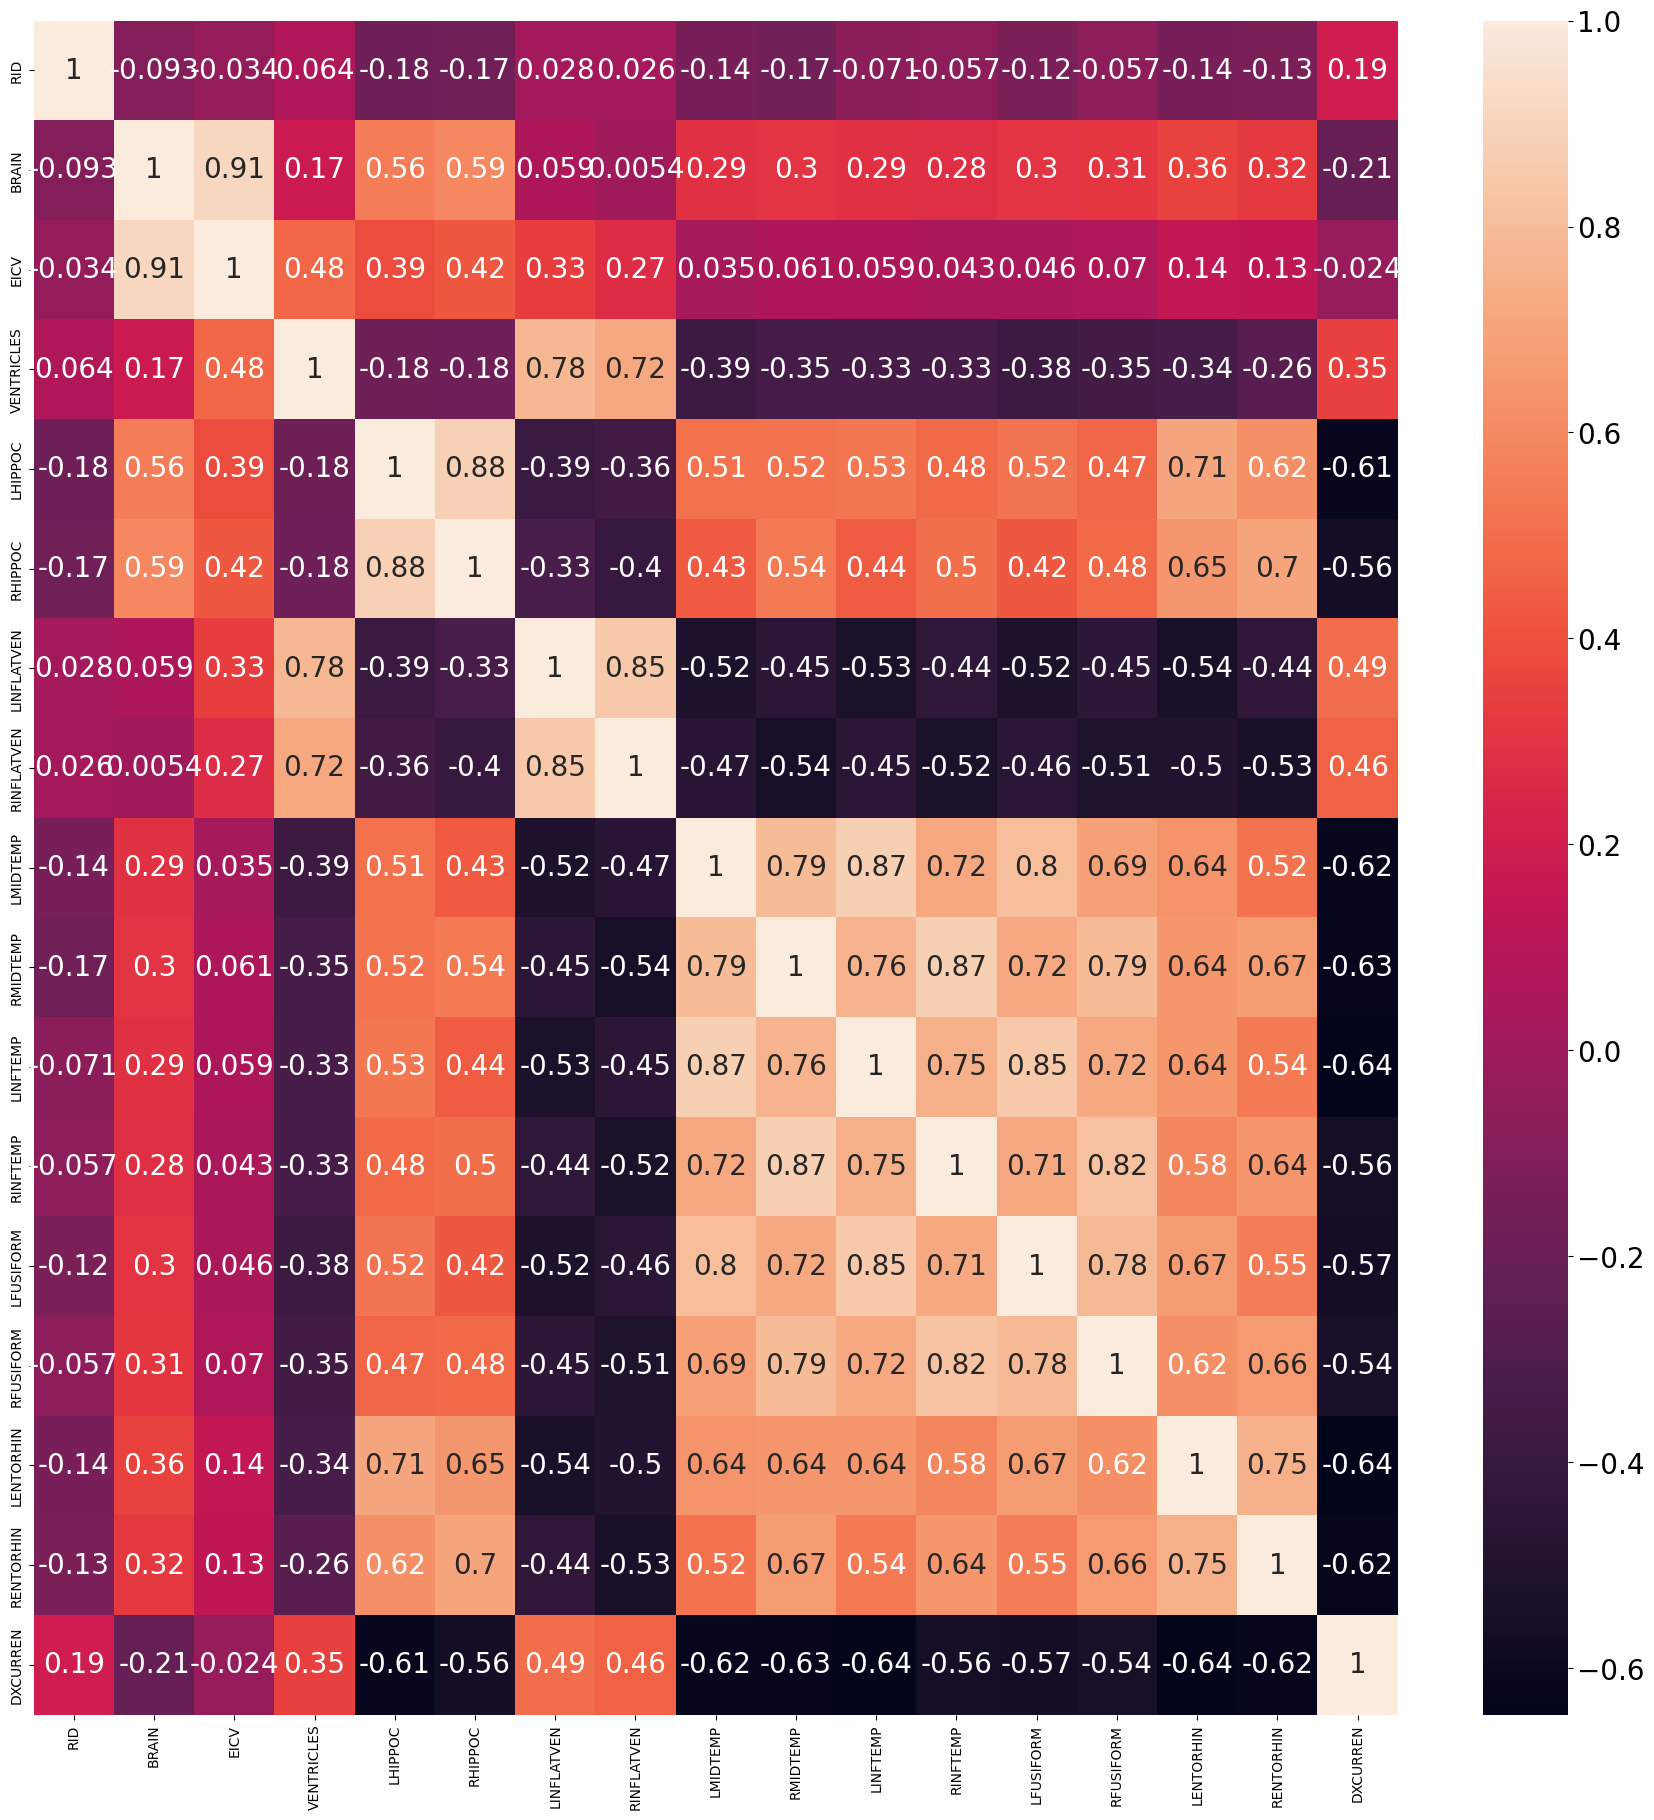

In [ ]:
plt.figure(figsize=(22,22))
ax = sns.heatmap(data.corr(), annot=True, annot_kws={'size': 20})
col_ax = plt.gcf().axes[-1]
col_ax.tick_params(labelsize=20)
plt.show()

In [ ]:
# obtain the most correlated features from the dataset

cols = [col for col in data.columns[1:-1]] # exclude the individual identifier and diagnostic status from the columns
corr_feat = data[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values(ascending=False) # unstack the dataframe and sort values in descending order
corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
corr_feat.head(10)

BRAIN       BRAIN         1.000000
            EICV          0.914554
LHIPPOC     RHIPPOC       0.882356
RMIDTEMP    RINFTEMP      0.874190
LINFTEMP    LMIDTEMP      0.871690
LINFLATVEN  RINFLATVEN    0.851397
LINFTEMP    LFUSIFORM     0.849473
RFUSIFORM   RINFTEMP      0.821934
LMIDTEMP    LFUSIFORM     0.803698
RMIDTEMP    RFUSIFORM     0.791022
dtype: float64

In [ ]:
corr_feat.tail(10)

LMIDTEMP    RINFLATVEN   -0.465602
LENTORHIN   RINFLATVEN   -0.500521
RFUSIFORM   RINFLATVEN   -0.511817
LINFLATVEN  LFUSIFORM    -0.519430
            LMIDTEMP     -0.519734
RINFLATVEN  RINFTEMP     -0.524645
LINFTEMP    LINFLATVEN   -0.529090
RINFLATVEN  RENTORHIN    -0.532744
LENTORHIN   LINFLATVEN   -0.535279
RMIDTEMP    RINFLATVEN   -0.542264
dtype: float64

Text(0.5, 1.0, 'RMIDTEMP vs RINFLATVEN')

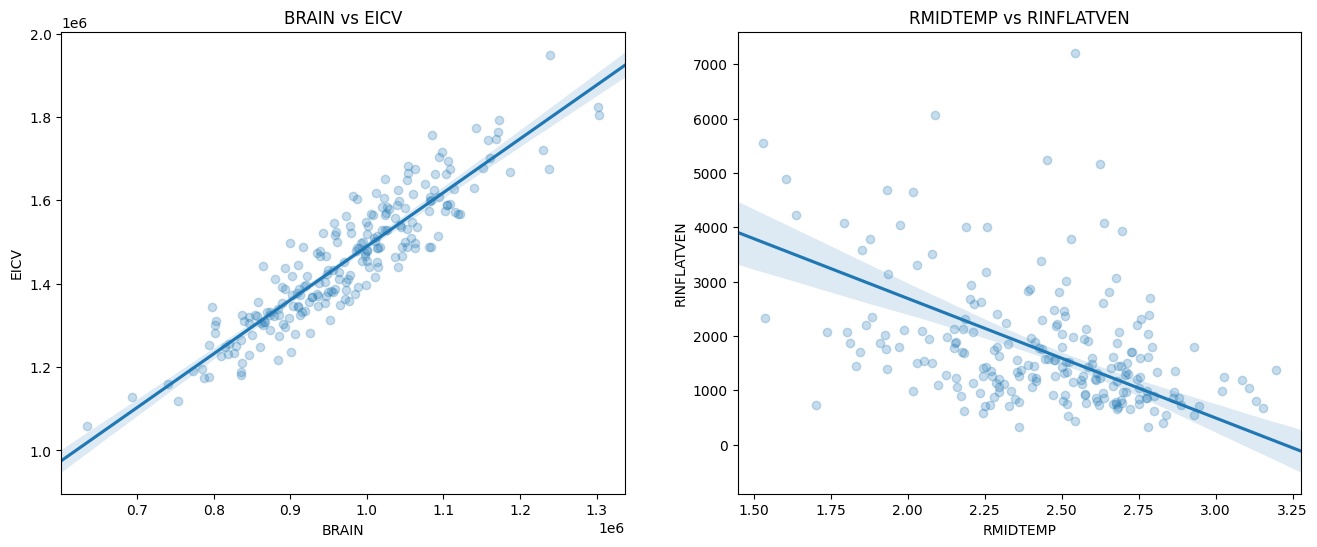

In [ ]:
# set figure for the plots
plt.figure(figsize=[16, 6])

plt.subplot(1,2,1) # first plot... BRAIN vs EICV
sns.regplot(data = data, x = 'BRAIN', y = 'EICV',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('BRAIN vs EICV')

plt.subplot(1,2,2) # second plot... RMIDTEMP vs RINFLATVEN
sns.regplot(data = data, x = 'RMIDTEMP', y = 'RINFLATVEN',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('RMIDTEMP vs RINFLATVEN')

In [ ]:
# check the number of subjects in the two groups
data['DXCURREN'].value_counts()

0    110
1    110
Name: DXCURREN, dtype: int64

In [ ]:
# obtain the mean of each feature in both group
demented_mean = Demented[cols].describe().loc['mean']
demented_mean

BRAIN         9.501246e+05
EICV          1.451390e+06
VENTRICLES    5.552915e+04
LHIPPOC       2.762603e+03
RHIPPOC       2.952135e+03
LINFLATVEN    2.249683e+03
RINFLATVEN    2.253310e+03
LMIDTEMP      2.218401e+00
RMIDTEMP      2.258468e+00
LINFTEMP      2.285647e+00
RINFTEMP      2.290316e+00
LFUSIFORM     2.099536e+00
RFUSIFORM     2.104474e+00
LENTORHIN     2.499836e+00
RENTORHIN     2.589077e+00
Name: mean, dtype: float64

In [ ]:
normal_mean = Normal[cols].describe().loc['mean']
normal_mean

BRAIN         9.963349e+05
EICV          1.458788e+06
VENTRICLES    3.811028e+04
LHIPPOC       3.533096e+03
RHIPPOC       3.678581e+03
LINFLATVEN    1.234751e+03
RINFLATVEN    1.244294e+03
LMIDTEMP      2.564385e+00
RMIDTEMP      2.598034e+00
LINFTEMP      2.620976e+00
RINFTEMP      2.588706e+00
LFUSIFORM     2.389659e+00
RFUSIFORM     2.365876e+00
LENTORHIN     3.186655e+00
RENTORHIN     3.298458e+00
Name: mean, dtype: float64

In [ ]:
# perform two sample T-test to determine features that are significantly different between the two groups
a = data[data["DXCURREN"]==0][cols]
b = data[data["DXCURREN"]==1][cols]

pvalue = pd.DataFrame(stats.ttest_ind(a=a, b=b)).T[1]
pvalue

0     1.464905e-03
1     7.209300e-01
2     1.444776e-07
3     3.110688e-24
4     6.790456e-20
5     7.197735e-15
6     7.144266e-13
7     5.668557e-25
8     2.069136e-25
9     1.167292e-26
10    2.104613e-19
11    3.829996e-20
12    9.731913e-18
13    3.026538e-27
14    9.028144e-25
Name: 1, dtype: float64

In [ ]:
# create a dataframe of the mean differences of the features for the two groups and the p-values
mean_diff = pd.DataFrame()
mean_diff["features"] = cols
mean_diff["demented"] = list(demented_mean)
mean_diff["normal"] = list(normal_mean)
mean_diff["mean difference"] = mean_diff["demented"] - mean_diff["normal"]
mean_diff["p-values"] = list(pvalue)
mean_diff = mean_diff.sort_values("p-values", ascending=True) #sort the p-values from the lowest to highest
mean_diff

,features,demented,normal,mean difference,p-values
13,LENTORHIN,2.499836e+00,3.186655e+00,-0.686819,3.026538e-27
9,LINFTEMP,2.285647e+00,2.620976e+00,-0.335329,1.167292e-26
8,RMIDTEMP,2.258468e+00,2.598034e+00,-0.339566,2.069136e-25
7,LMIDTEMP,2.218401e+00,2.564385e+00,-0.345984,5.668557e-25
14,RENTORHIN,2.589077e+00,3.298458e+00,-0.709381,9.028144e-25
3,LHIPPOC,2.762603e+03,3.533096e+03,-770.493091,3.110688e-24
11,LFUSIFORM,2.099536e+00,2.389659e+00,-0.290123,3.829996e-20
4,RHIPPOC,2.952135e+03,3.678581e+03,-726.445727,6.790456e-20
10,RINFTEMP,2.290316e+00,2.588706e+00,-0.298390,2.104613e-19
12,RFUSIFORM,2.104474e+00,2.365876e+00,-0.261402,9.731913e-18


In [ ]:
# obtain the significant features... these are features with p-values less than 0.05
sig_features = mean_diff[mean_diff["p-values"] <= 0.05]["features"]
sig_features

13     LENTORHIN
9       LINFTEMP
8       RMIDTEMP
7       LMIDTEMP
14     RENTORHIN
3        LHIPPOC
11     LFUSIFORM
4        RHIPPOC
10      RINFTEMP
12     RFUSIFORM
5     LINFLATVEN
6     RINFLATVEN
2     VENTRICLES
0          BRAIN
Name: features, dtype: object

## 5. Model Building <a name="Model-Building"></a>
In thise section we build predictive models using machine learning algorithms.
First we have to split the dataset for training and testing.


In [ ]:
#dropping irrelevant feature
data.drop(['RID'], axis=1, inplace = True)

In [ ]:
input_cols = [col for col in data.columns[:-1]] # select the input columns

x = data[input_cols] # input data
y = data['DXCURREN'] # target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)

(176, 15) (176,)


In [ ]:
sc = StandardScaler() # create an instance of the scaler
train = sc.fit_transform(X_train) # fit the scaler on the training set
train_input = pd.DataFrame(train, columns=input_cols) # convert the scaled data array into dataframe


val = sc.transform(X_test) # transform the scaler on the validation set
val_input = pd.DataFrame(val, columns=input_cols)

train_input.head()

,BRAIN,EICV,VENTRICLES,LHIPPOC,RHIPPOC,LINFLATVEN,RINFLATVEN,LMIDTEMP,RMIDTEMP,LINFTEMP,RINFTEMP,LFUSIFORM,RFUSIFORM,LENTORHIN,RENTORHIN
0,-1.197470,-0.898390,0.047310,-1.483716,-1.209035,0.810287,0.614007,-0.321485,-0.340483,-0.804033,-1.517071,-1.261291,-0.832737,-0.080695,-0.051531
1,-0.003505,-0.653721,-1.390894,2.648516,2.374907,-1.066128,-0.885289,0.698345,0.910034,0.095748,0.532447,-0.170352,-0.030630,0.891725,0.516048
2,-0.612334,-0.740438,0.070481,-0.459276,-1.186119,-0.218392,0.150823,-0.164108,-0.827095,-0.612468,-0.880090,0.037346,-0.436351,-0.661896,-0.822156
3,0.209429,0.115838,0.123277,-1.126826,-1.226319,0.092440,0.249148,-0.087501,0.195937,-0.788057,0.521805,-0.357156,-0.035862,-0.657359,-1.147314
4,0.951778,0.174839,-0.933264,1.113446,0.691902,-1.163315,-0.828359,1.578209,1.801102,1.433832,1.802145,1.955015,1.968382,0.789918,0.699898


### 5.1 Naive Bayes Classifier <a name="Naive-Bayes-Classifier"></a>

In [ ]:
nb_clf = GaussianNB() # get instance of model
nb_clf.fit(train_input, y_train) # Train/Fit model

# use the train model to predict the validation set
y_pred_nb = nb_clf.predict(val_input)

accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Classifier Accuracy: {accuracy*100:.1f}%")

Classifier Accuracy: 90.9%


### 5.2 K-Nearest Neighbours <a name="K--Nearest-Neighbours"></a>

In [ ]:
knn_clf = KNeighborsClassifier() # get instance of model
knn_clf.fit(train_input, y_train) # train/fit the model
y_pred_knn = knn_clf.predict(val_input) # get the target predictions
accuracy = accuracy_score(y_test, y_pred_knn) #obtain the accuracy score of the model

print(f"KNN Classifier Accuracy: {accuracy*100:.1f}%")

KNN Classifier Accuracy: 90.9%


In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Create new KNN object

knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(train_input, y_train)
y_pred = best_model.predict(val_input)
accuracy = accuracy_score(y_test, y_pred)

#Print The value of best Hyperparameters
print('Accuracy: ', accuracy)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Accuracy:  0.9318181818181818
Best leaf_size: 1
Best p: 2
Best n_neighbors: 7


## 6. Evaluation <a name="Evaluation"></a>
In this secton we evaluate the performance of the models and compare them.

Text(0.5, 1.0, 'Naives Bayes Confusion Matrix')

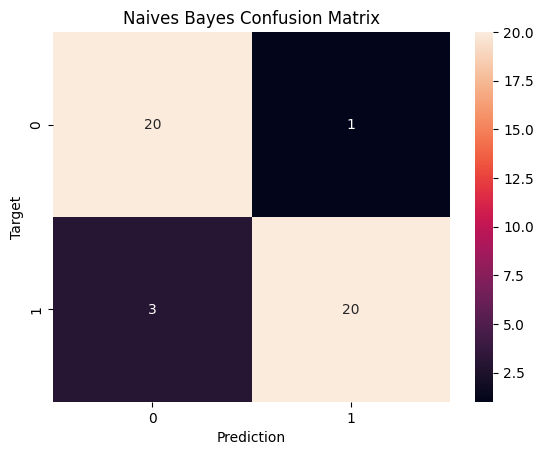

In [ ]:
#Confusion Matrix for Naives Bayes Classifier
nb_cf = confusion_matrix(y_test, y_pred_nb)

# plot an heatmap of the confusion matrix
plt.figure()
sns.heatmap(nb_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Naives Bayes Confusion Matrix')

In [ ]:
# obtain true and false positive and negative data point
TP = nb_cf[1,1] # true positive
TN = nb_cf[0,0] # true negative
FP = nb_cf[1,0] # False positive
FN = nb_cf[0,1] # false negative

# determine the evaluation metrics

nb_accuracy = (TP+TN)/(TP+TN+FN+FP)
nb_sensitivity = TP / (TP + FN)
nb_specificity = TN / (TN + FP)
nb_precision = TP / (TP + FP)
nb_recall = TP / (TP + FN)


#calculate AUC of model
nb_auc = roc_auc_score(y_test, y_pred_nb)

# create a dictionary for the evaluation metrics
nb_perf = [{'Accuracy': nb_accuracy, 'Sensitivity': nb_sensitivity, 'Specificity': nb_specificity,
                  'Precision': nb_precision, 'AUC': nb_auc}]
nb_perf_df = pd.DataFrame.from_dict(nb_perf) # convert the dictionary to dataframe
nb_perf_df

,Accuracy,Sensitivity,Specificity,Precision,AUC
0,0.909091,0.952381,0.869565,0.869565,0.910973


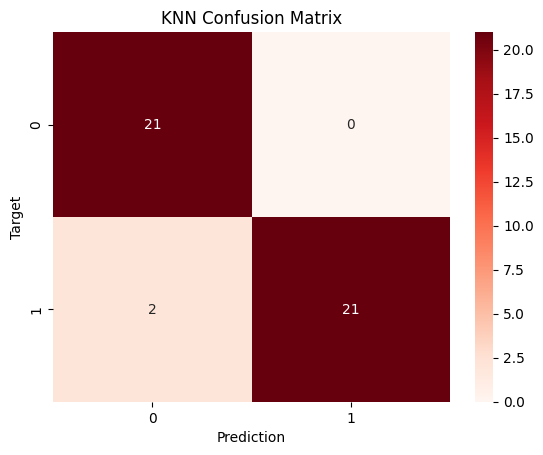

In [ ]:
knn_clf2 = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=13)
knn_clf2.fit(train_input, y_train)
y_pred = knn_clf2.predict(val_input)

# generate the confusion matrix for the KNN classifier
knn_cf = confusion_matrix(y_test, y_pred)

# plot an heatmap of the confusion matrix
plt.figure()
sns.heatmap(knn_cf, cmap='Reds', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Confusion Matrix');

In [ ]:
TP = knn_cf[1,1] # true positive
TN = knn_cf[0,0] # true negative
FP = knn_cf[1,0] # False positive
FN = knn_cf[0,1] # false negative

# determine the evaluation metrics
knn_accuracy = (TP+TN)/(TP+TN+FN+FP)
knn_sensitivity = TP / (TP + FN)
knn_specificity = TN / (TN + FP)
knn_precision = TP / (TP + FP)

#calculate AUC of model
knn_auc = roc_auc_score(y_test, y_pred)

# create a dictionary for the evaluation metrics
knn_perf = [{'Accuracy': knn_accuracy, 'Sensitivity': knn_sensitivity, 'Specificity': knn_specificity,
                  'Precision': knn_precision, 'AUC': knn_auc}]
knn_perf_df = pd.DataFrame.from_dict(knn_perf) # convert the dictionary to dataframe
knn_perf_df

,Accuracy,Sensitivity,Specificity,Precision,AUC
0,0.954545,1.0,0.913043,0.913043,0.956522


In [ ]:
metrics = {'Model': ['KNN', 'Naives Bayes'], 'Accuracy': [knn_accuracy, nb_accuracy],
            'Sensitivity': [knn_sensitivity, nb_sensitivity], 'Specificity': [knn_specificity, nb_specificity],
            'Precision': [knn_precision, nb_precision], 'AUC': [knn_auc, nb_auc]}

# convert the metrics dictionary to dataframe
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,Model,Accuracy,Sensitivity,Specificity,Precision,AUC
0,KNN,0.954545,1.000000,0.913043,0.913043,0.956522
1,Naives Bayes,0.909091,0.952381,0.869565,0.869565,0.910973


<ipython-input-57-61926c07bca8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=metrics_df, x='Model', y='Accuracy',palette='dark')
<ipython-input-57-61926c07bca8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=metrics_df, x='Model', y='Sensitivity',palette='dark')
<ipython-input-57-61926c07bca8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=metrics_df, x='Model', y='Specificity',palette='dark')
<ipython-input-57-61926c07bca8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

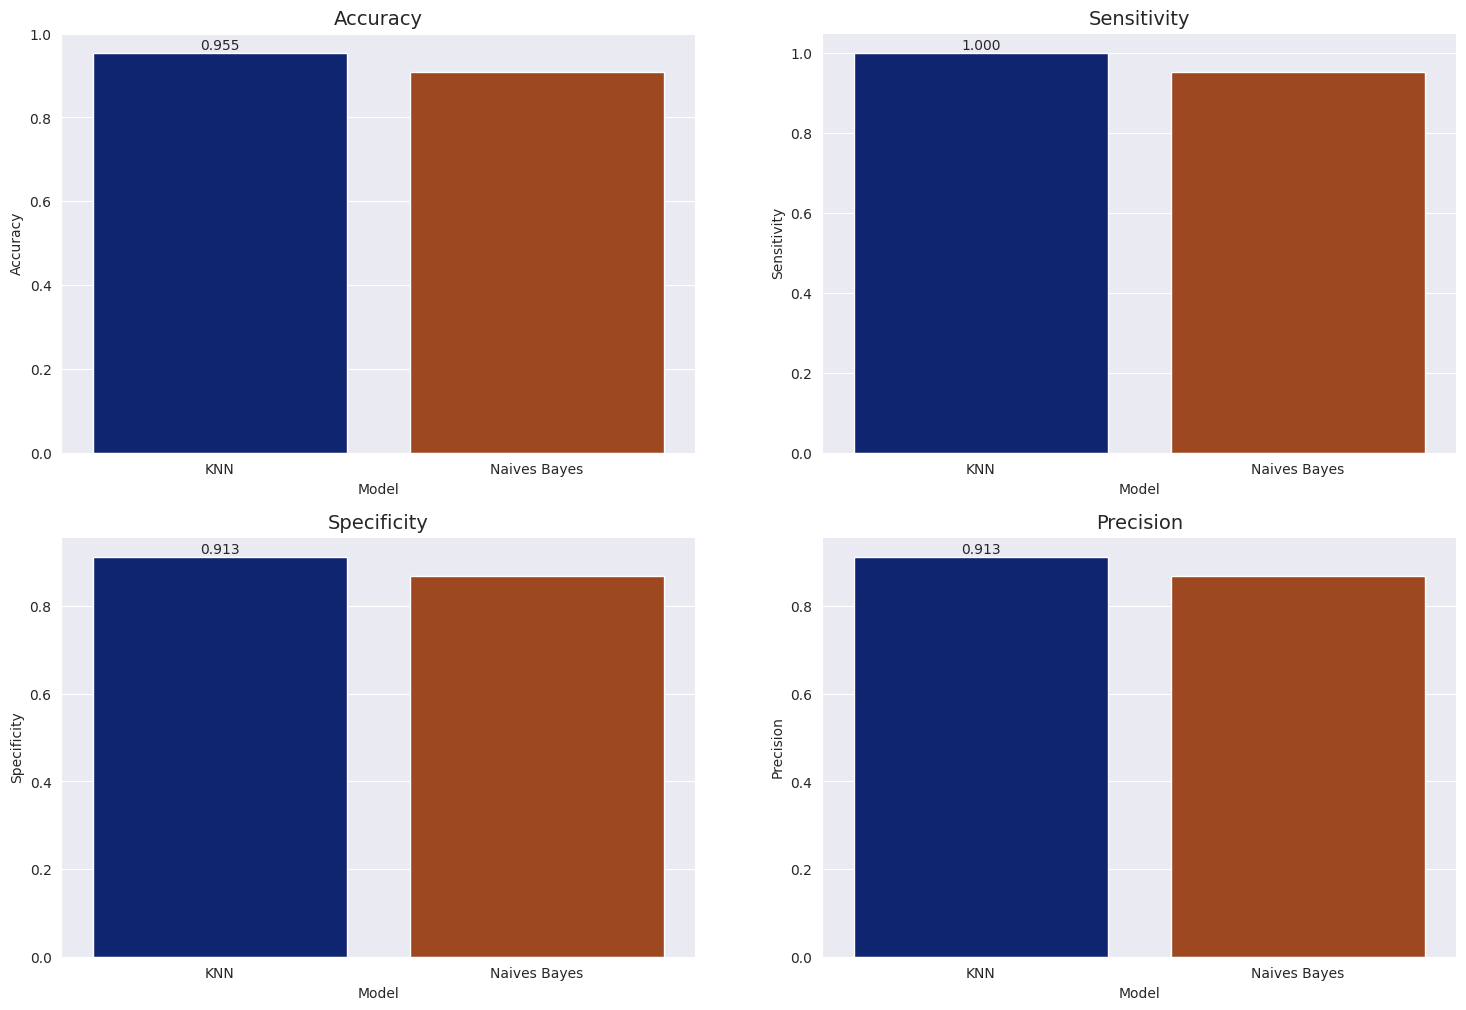

In [ ]:
# set figure for the plots
plt.figure(figsize=[18, 12])
sns.set_style('darkgrid')
color = sns.color_palette()[1] # plot the bars with the same colour for all categories

plt.subplot(2,2,1)
ax = sns.barplot(data=metrics_df, x='Model', y='Accuracy',palette='dark')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Accuracy", fontsize=14)

plt.subplot(2,2,2)
ax = sns.barplot(data=metrics_df, x='Model', y='Sensitivity',palette='dark')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Sensitivity", fontsize=14)

plt.subplot(2,2,3)
ax = sns.barplot(data=metrics_df, x='Model', y='Specificity',palette='dark')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Specificity", fontsize=14)

plt.subplot(2,2,4)
ax = sns.barplot(data=metrics_df, x='Model', y='Precision',palette='dark')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title("Precision", fontsize=14);

## 7. Conclusion <a name="Conclusion"></a>

Based on the evaluation metrics, it was observed that the Naive Bayes Classifier outperformed the K-Nearest Neighbor (KNN) model in classifying patients with Alzheimer's disease. This classification was achieved by utilizing both the extracted MRI images and additional data from the ADNI dataset.

To optimize the performance of the KNN classifier, a grid search technique was employed to identify the optimal combination of parameters that yielded the highest accuracy for the classifier.